In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-price-predictions/true_car_listings.csv


KUTUPHANELERI IMPORT ETME VE DATASET

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter (action = 'ignore') #Phytondaki warnings modülü çıktıdaki uyarıların görünmemesini sağlar.

In [44]:
df=pd.read_csv("/kaggle/input/used-car-price-predictions/true_car_listings.csv") #Veriyi DataFrame'e kaydettik.

In [45]:
df.head() #Aksi belirtilmedigi halde datanın ilk 5 satirini cagirir.

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [46]:
df.info() #Veri hakkinda genel bilgileri almamizi saglar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


Veri Hakkinda Daha Detayli Bilgiye Sahip Olma

In [47]:
df.shape #Verimizin satir ve sutun bilgilerni elde etmemizi saglar.

(852122, 8)

In [48]:
df.isnull().sum() #Veride boş deger olmadıgını biliyoruz ama yine de kontrol etmekten zarar gelmez :)

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [49]:
df.duplicated().sum() #Verimizdeki benzersiz satir sayısını bulur biz de bu sayiya gore adimlarimizi gerceklestirecegiz.

30

In [50]:
df.dtypes #verimizdeki veri türlerini kontrol ediyoruz.

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [51]:
df.nunique() #Her sutunun altindaki benzersiz sayilara bakiyoruz.

Price       47124
Year           22
Mileage    158836
City         2553
State          59
Vin        852075
Make           58
Model        2736
dtype: int64

Veri Ön Elemesi

In [52]:
#Öncelikle verimizi inceledigimizde bazi isimize yaramayacak bilgiler, sayilar oldugunu goruyoruz.
#Araba fiyatlarini etkilemeyecek olan degerleri verimizden cikartiyoruz.

df.drop('City', axis=1, inplace=True) #Arabanin satildigi sehir
df.drop('State', axis=1, inplace=True) #Arabanin satildigi eyalet
df.drop('Vin', axis=1, inplace=True) #Arabanin seri numarasi (Bazi ozel durumlarda bu aracın fiyatını etkileyebilir ama geneli ele almamız daha saglikli olur.)


In [53]:
df.head()

,Price,Year,Mileage,Make,Model
0,8995,2014,35725,Acura,ILX6-Speed
1,10888,2013,19606,Acura,ILX5-Speed
2,8995,2013,48851,Acura,ILX6-Speed
3,10999,2014,39922,Acura,ILX5-Speed
4,14799,2016,22142,Acura,ILXAutomatic


Numerik Verilerin İncelenmesi

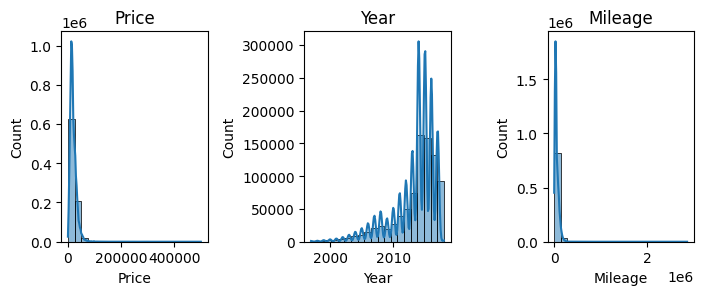

In [54]:
#Burada verimizdeki sayisal degerlerin grafiklerini inceleyecegiz.
numerical_features = ["Price","Year","Mileage"]

#Matplotlibden kendimize bir grafik cizdiriyoruz ve sırasıyla "numerical_features"a atadıgımız degerleri grafikte gostermesini istiyoruz.

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

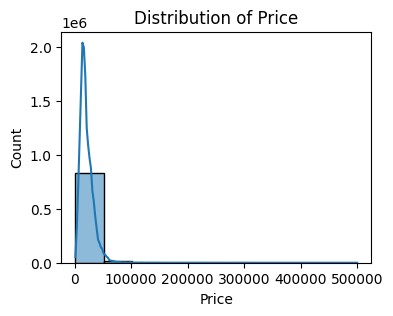

In [55]:
#Fiyat Grafiğini bir de tek başına inceleyelim.
plt.figure(figsize=(4, 3))
sns.histplot(data=df["Price"], bins=10, kde=True)
plt.title("Distribution of Price")
plt.show()
#Bu grafikte gördüğümüz üzere fiyatların tam olarak hangi aralıkta olduğunu görmüş olduk.

Veriler Arasındaki Bağ ve Detaylı İşlemler

In [56]:
df["Make"].unique()

#Verimizde string ifadeler de olduğu için bunların detayına bakıyoruz.

array(['Acura', 'Alfa', 'AM', 'Aston', 'Audi', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT',
       'Fisker', 'Ford', 'Freightliner', 'Genesis', 'Geo', 'GMC', 'Honda',
       'HUMMER', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
       'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion',
       'smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [57]:
#Verilerimizdeki string ifadelerle de işlem yapabilmemiz için bu ifadeli sayısal değerlere çevirmemiz gerekiyor.Bunun için "label encoder" modülünü kullancağız.
from sklearn.preprocessing import LabelEncoder #sklearnden modülü import ediyoruz.

lenc = LabelEncoder() #Kolaylık olması için modülü kısaltmaya atıyoruz.

df["Make"]=lenc.fit_transform(df["Make"])
df["Model"]=lenc.fit_transform(df["Model"])

In [58]:
df["Make"].head() #İstediğimiz gibi olup olmadığını kontrol ediyoruz.
df["Model"].head()

0    1194
1    1193
2    1194
3    1193
4    1196
Name: Model, dtype: int64

In [59]:
#Verideki Arabalarda kat edilen mesafeler çok büyük değerlere ulaştığı için bu veriler bir hataya yol açabilir bu yüzden bunları 0 ile 1 arasında oranlayacağız. Bunun için de "minmaxscaler" kullanacağız.

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

df[["Mileage"]] = mms.fit_transform(df[["Mileage"]])


In [60]:
df.head() #şimdi gördüğümüzde artık tüm verilerimiz satısal türden olduğunu biliyoruz. İstediğimiz gibi işlem yapabiliriz.

,Price,Year,Mileage,Make,Model
0,8995,2014,0.012506,1,1194
1,10888,2013,0.006863,1,1193
2,8995,2013,0.017102,1,1194
3,10999,2014,0.013976,1,1193
4,14799,2016,0.007751,1,1196


KORELASYON

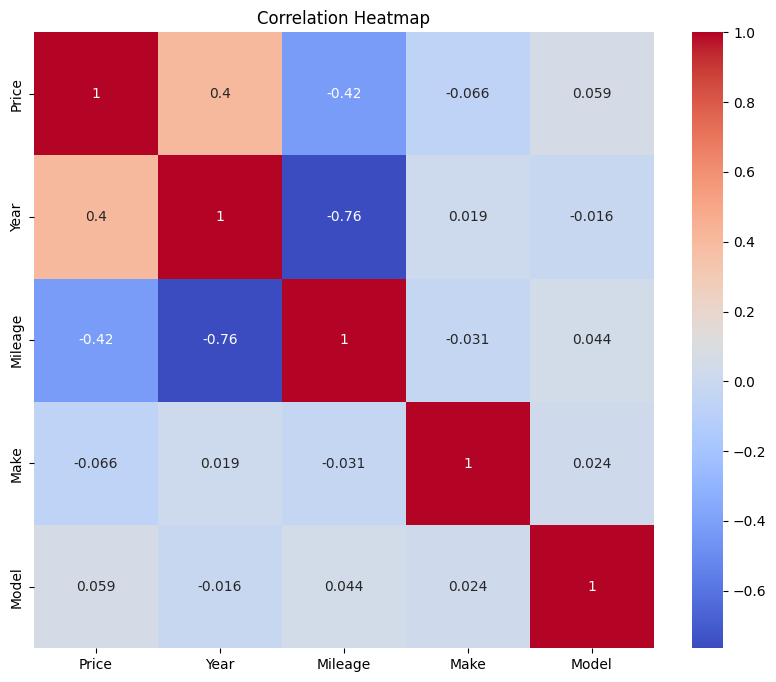

In [61]:
#Veriler arasındaki orana bakabilmek için bir korelasyon grafiği oluşturuyoruz.
#Ama ilk önce sayısal verilere çevirmiş olduğumuz Marka ve Modelleri de numerik verilerimize ekleyelim
numerical_features = ["Price","Year","Mileage","Make","Model"]

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [62]:
#Absürt bir değer olmadığını gözlemyebildiğimiz için verimiz için artık öğretme kısmına geçebiliriz.

MAKİNE ÖĞRENMESİ-GÖZETİMLİ ÖĞRENME

In [63]:
x = df.drop("Price", axis=1) #Hedef değerimizi veriden düşürüyoruz.
y = df["Price"] #Hedefimizi tes edebilmek amacıyla başka bir değişkene atıyoruz.

In [64]:
#Artık verimizi train ve test edecek şekilde ayırabiliriz.Bunun için "train_test_split" modülünü kullanacağız.
from sklearn.model_selection import train_test_split #Modülü import ettik.

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=21)#Modelimizin yüzde 30unuz test olacak şekilde ayırdık.

Regresyon

In [65]:
#Kullanacağımız modelleri import ettik.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#Hepsini tek tek denemek yerine bir döngü şeklinde denetebiliriz bu yüzden hepsini bir listeye ekliyoruz.
models = []
models.append(["XGB",XGBRegressor()])
models.append(["KNeigbors",KNeighborsRegressor()])
models.append(["DecisionTree",DecisionTreeRegressor()])
models.append(["RandomForest",RandomForestRegressor()])
models.append(["LightGBM",LGBMRegressor()])

In [66]:
models

[['XGB',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)],
 ['KNeigbors', KNeighborsRegressor()],
 ['DecisionTree', DecisionTreeRegressor()],
 ['RandomForest', RandomForestRegressor()],
 ['LightGBM', LGBMRegressor()]]

In [67]:
from sklearn.metrics import r2_score #r2_score modülünü import etmemizin nedeni bize en doğru modeli söyleyecek olması.l1 = []

In [68]:
l1 = [] #r2 skorlarını listelemek için boş bir liste oluşturuyoruz buna ekleyeceğiz skorları.
for i in range(len(models)):
    l2 = [] 
    model = models[i][1]
    model.fit(xtrain,ytrain) #Training setimizi modelimize fitliyoruz.
    y_pred = model.predict(xtest) #Test setimizle tahminler yapıyoruz.
    
    l2.append(models[i][0])
    l2.append(r2_score(ytest,y_pred))
    l1.append(l2) #r2 modelinin skorlarını burada listeliyoruz
    

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 596485, number of used features: 4
[LightGBM] [Info] Start training from score 21472.602649


In [69]:
l1 #Burada doğruluğu en yüksek model olarak Kneighbors modeli olduğunu görebiliyoruz.

[['XGB', 0.848777640631462],
 ['KNeigbors', 0.886672956821228],
 ['DecisionTree', 0.8118986280397177],
 ['RandomForest', 0.8688668210062941],
 ['LightGBM', 0.8075490583472671]]

In [70]:
data = pd.DataFrame(l1,columns=['Model','r2_score']) #Derli toplu olması için hepsini bir araya topluyoruz
data.sort_values(by=['r2_score'],inplace=True,ascending=True) # r2 skorlarını sıralıyoruz.
data

,Model,r2_score
4,LightGBM,0.807549
2,DecisionTree,0.811899
0,XGB,0.848778
3,RandomForest,0.868867
1,KNeigbors,0.886673


In [72]:
#Deney yapalım
new_data = {'Year':2017, 'Mileage':0.000874, 'Make':56, 'Model':2571} #Yeni bir data olarak sıfırıncı indexe atayacğız
index=[0]
new_dataset = pd.DataFrame(new_data,index)
new_dataset

,Year,Mileage,Make,Model
0,2017,0.000874,56,2571


In [74]:
#Fiyatr tahminini yapacağız şimdi
for i in range(len(models)):
    i1 = models[i][1] 
    new_pred = i1.predict(new_dataset)
    print("The predicted price with "+str(models[i][1])+" is "+str(new_pred))

The predicted price with XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) is [47885.383]
The predicted price with KNeighborsRegressor() is [67823.6]
The predicted price with DecisionTreeRegressor() is [68364.]
The predicted price with RandomForestRegressor() is [67610.53]
The predicted price with LGBM

In [75]:
 #En doğru tahmin KNeighbors olduğu için muhtemel değerimiz de 67823.6

MAKİNE ÖĞRENMESİ- GÖZETİMSİZ ÖĞRENME

In [76]:
#GÖzetimli öğrenme ile modelimizi tasarladık şimdi gözetimsiz öğrenme sonuçlarımıza da bakalım.
#Gözetimsiz öğrenmede gözetimliden farklı olarak şunu yapacağız.Gözetimlide en uygun modeli bulmuştuk şimdi de farklılık olarak en uygun sayıyı bulalım.

In [77]:
#İhtiyacımız olan modelleri ve modülleri import ediyoruz.
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram 

<Axes: title={'center': 'Price Distribution Plot'}, xlabel='Price', ylabel='Density'>

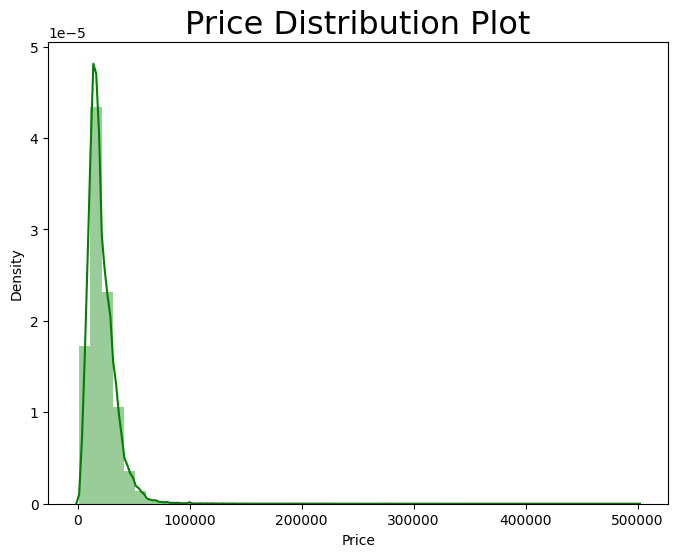

In [78]:
#İlk önce küme merkezini belirleyelim.
f0, ax = plt.subplots(figsize=(8, 6))
plt.title( "Price Distribution Plot",fontsize=23)
sns.distplot(df["Price"], color="green")

In [84]:
#Küme merkezimizi tam olarak belirleyememiş olsak da grafiğimize bakarak 30-40k civarında olduğunu anlatabiliyoruz.
#Tekrardan kolerasyonumuzu buraya taşıyalım.

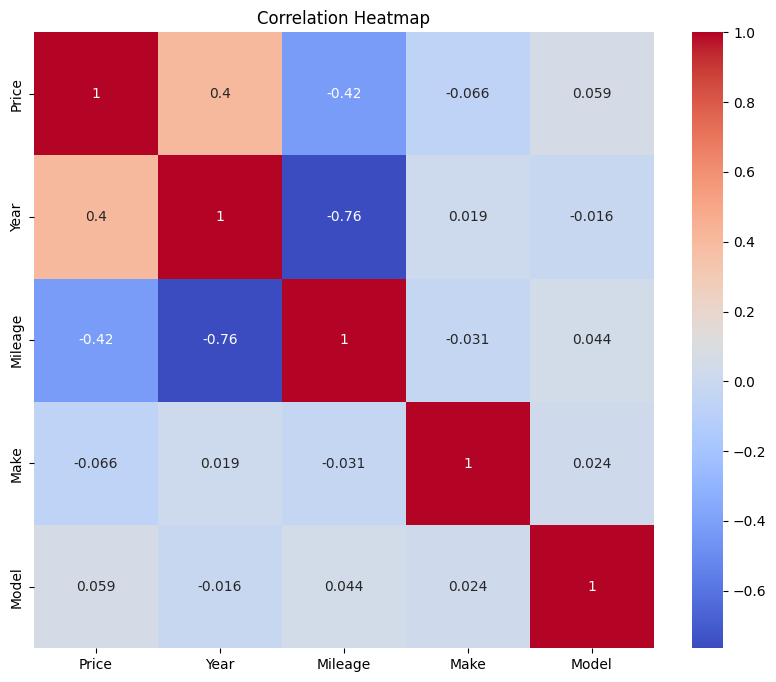

In [85]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

İdeal küme sayımızı bulma

In [86]:
#Burada henüz yeni öğrenmiş olduğum dirsek methodunu kullanacağız.
scaler = StandardScaler()
df_dropped = df.drop("Price", axis=1)
X = df_dropped.values[:, 1:]
scaled_x = scaler.fit_transform(X) #Hedef setimizi scale ettik

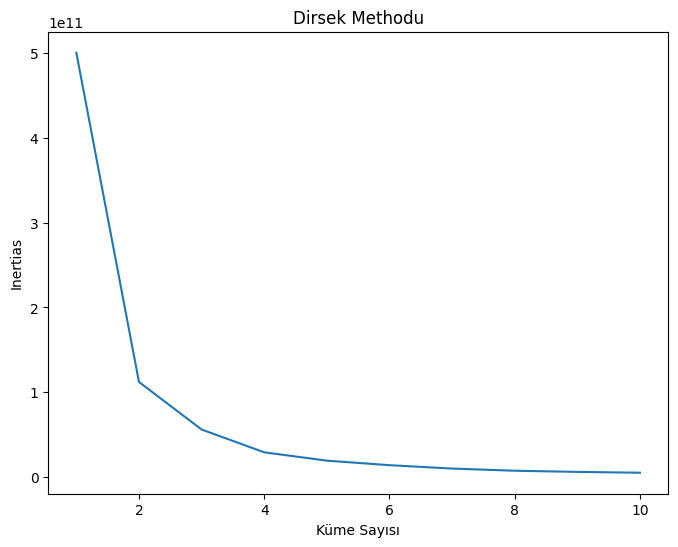

In [95]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title("Dirsek Methodu")
plt.xlabel("Küme Sayısı")
plt.ylabel('Inertias')
plt.show()

In [96]:
#Küme sayımız 3 gibi gözüküyor çünkü sonradan inertia değerinin düşme hızı azalıyor.

In [97]:
df.tail()

,Price,Year,Mileage,Make,Model
852117,63215,2017,0.000001,56,2034
852118,72260,2017,0.001119,56,2570
852119,55999,2016,0.010131,56,2564
852120,60240,2017,0.001050,56,2404
852121,76995,2017,0.000874,56,2571


In [98]:
#Verimizin ortalama tekrardan %30unu almak için 255000 veriyi burada training için kullanıyoruz.
model = KMeans(n_clusters=3)
training_points = scaled_x[:255000]
test_points = scaled_x[255000:]
model.fit(training_points)
labels = model.predict(test_points)

#Traininge göre kalan ortalama 600000 veriyi de sınıflandırmış olması gerekiyor.

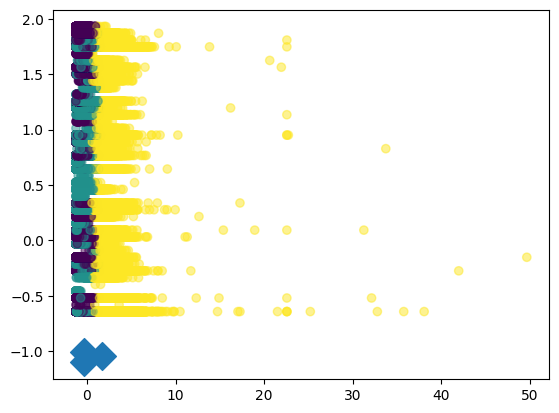

In [99]:
#Sınıflandırılan modelimizi çizdiriyoruz.
xs = test_points[:,0]
ys = test_points[:,1]
plt.scatter(xs, ys, c=labels, alpha=0.5)
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

In [100]:
#Modelimiz oldukça karışık gözüküyor, daha iyi bir sonuç alabilmek için boyut azaltma yapacağız.

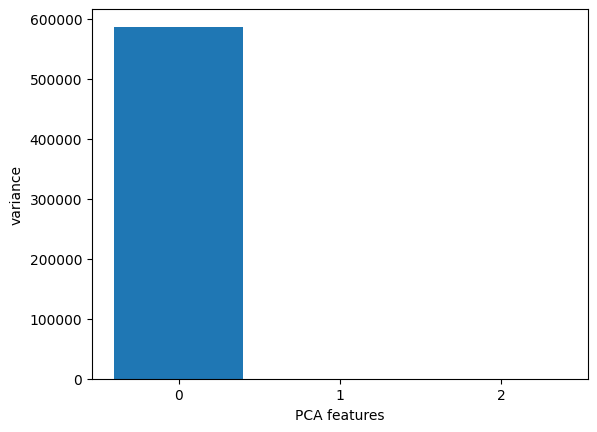

In [136]:
from sklearn.decomposition import PCA #Gerekli modülümüzü import ediyoruz.
pca = PCA()
pca_features=pca.fit(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.xticks(features)
plt.show()

In [103]:
#Bu grafikte verimiz tek boyutlu gözüküyor bunun için bileşen sayımızı 2 olarak belirleyebiliriz ama ilk önce 2 olarak belirlersek ne kadar veri kaybına uğrayacağımızı bakalım.

In [155]:
pca= PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
#Neredeyse veri kaybımız olmuyor bile diyebiliriz bu da oldukça güzel.

[9.99546619e-01 4.53380214e-04]
0.9999999996332879


In [156]:
pca = PCA(n_components=2)
pca.fit(scaled_x)
pca_features = pca.transform(scaled_x)

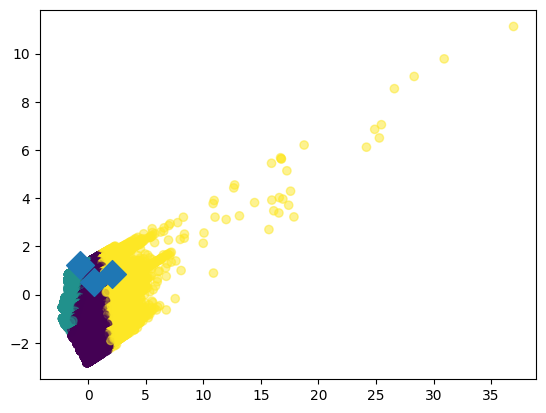

In [157]:
#Şimdi ise modelimizi tekrardan çizdiriyoruz.

model = KMeans(n_clusters=3)
training_points = pca_features[:255000]
test_points = pca_features[255000:]
model.fit(training_points)
labels = model.predict(test_points)
xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

In [ ]:
#Yine çok düzgün olmasa da çünkü verimiz gruplandırmaya öok uygun bir veri değildi, öncekinden çok daha ayrılmış ve grup halinde verilerimiz var.